In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the dataset
df = pd.read_csv("HIV_dataset_resampled.csv")

In [3]:
# Separate features and target
X = df.drop("Result", axis=1).values
y = df["Result"].values

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Reshape for 1D CNN: (samples, features, 1)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [7]:
# Build 1D CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(34, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

C:\Users\sheik\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train
model.fit(X_train_cnn, y_train, epochs=250, batch_size=150, validation_data=(X_test_cnn, y_test))

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.5195 - loss: 0.6967 - val_accuracy: 0.5887 - val_loss: 0.6769
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5723 - loss: 0.6803 - val_accuracy: 0.6241 - val_loss: 0.6682
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5699 - loss: 0.6725 - val_accuracy: 0.6241 - val_loss: 0.6622
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6077 - loss: 0.6605 - val_accuracy: 0.6383 - val_loss: 0.6571
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6029 - loss: 0.6618 - val_accuracy: 0.6525 - val_loss: 0.6527
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5875 - loss: 0.6699 - val_accuracy: 0.6667 - val_loss: 0.6483
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6124 - loss: 0.6560 - val_accuracy: 0.6596 - val_loss: 0.6444
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6200 - loss: 0.6562 - val_accuracy: 0.6667 - val_loss:

In [10]:
# Evaluate
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7545 - loss: 0.5748 
Test Accuracy: 0.74


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions as probabilities
y_pred_probs = model.predict(X_test_cnn)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Confusion Matrix:
 [[55 19]
 [18 49]]


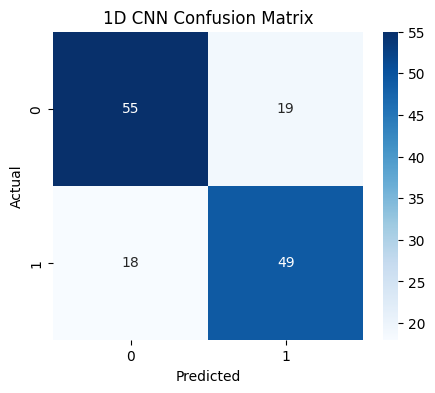

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.75      0.74      0.75        74
     Class 1       0.72      0.73      0.73        67

    accuracy                           0.74       141
   macro avg       0.74      0.74      0.74       141
weighted avg       0.74      0.74      0.74       141



In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("1D CNN Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))
